# Example

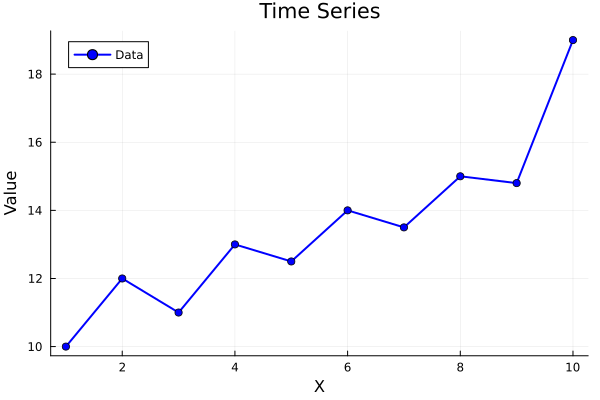

In [2]:
import Plots
using TimeSeriesKit

ts = TimeSeries([10.0, 12.0, 11.0, 13.0, 12.5, 14.0, 13.5, 15.0, 14.8, 19.0])
plot_timeseries(ts)

# Linear Regression

Is fitted? true
X Out of Sample: [6, 7, 8, 9, 10, 11, 12, 13]
Y Out of Sample: [13.500000000000002, 14.100000000000001, 14.700000000000003, 15.300000000000002, 15.900000000000002, 16.500000000000004, 17.1, 17.700000000000003]


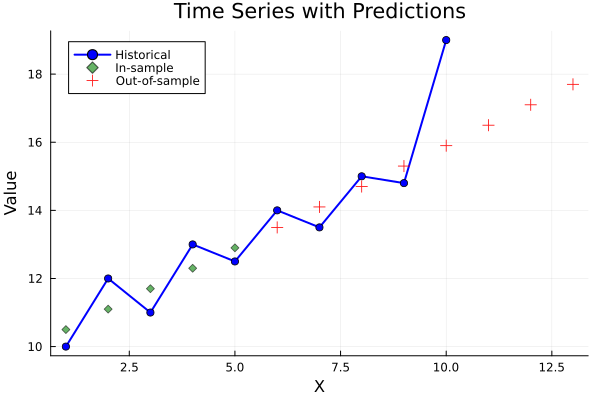

In [3]:
# Split data
train_ts = ts[1:5]
val_x = extrapolate_timestamps(train_ts, length(ts) - length(train_ts) + 3)

# Fit Linear Model
model_linear = LinearModel()
fit(model_linear, train_ts)
println("Is fitted? $(is_fitted(model_linear))")


# Predict ins-ample and out-of-sample
in_sample = predict(model_linear, train_ts.timestamps)
out_of_sample = predict(model_linear, val_x)
println("X Out of Sample: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, in_sample, out_of_sample)

### Iterative training  with sliding_window 3

Is fitted? true
X values: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Y Out of Sample: [13.999999999999993, 10.000000000000007, 15.0, 11.999999999999977, 15.499999999999986, 13.00000000000005, 16.49999999999996, 14.600000000000001, 23.200000000000298, 27.400000000000507, 31.60000000000071, 35.80000000000091]


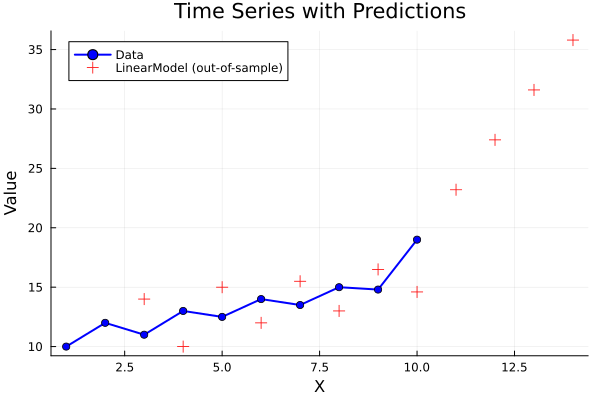

In [4]:

# Fit a linear model
model_linear = LinearModel(sliding_window=2)
fit(model_linear, ts)

println("Is fitted? $(is_fitted(model_linear))")

# Or predict at specific x values
out_of_sample = iterative_predict(model_linear, ts, 4)
println("X values: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, out_of_sample)

# Simple Exponential Smoothing

Optimized alpha: 0.8


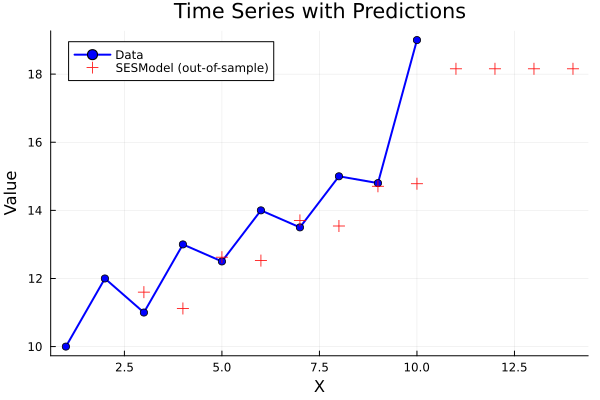

In [5]:
# Example with SES model

# Fit SES model (alpha will be optimized)
model_ses = SESModel()
fit(model_ses, ts)

println("Optimized alpha: ", model_ses.alpha)

# Forecast
predicted_ses = iterative_predict(model_ses, ts, 4)

# Plot
plot_timeseries(ts, predicted_ses)

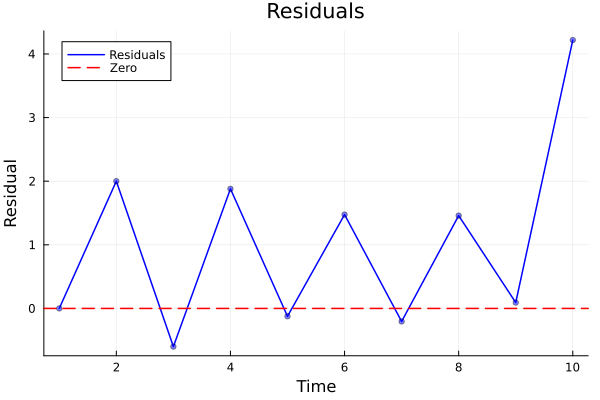

In [6]:
# Plot residuals
plot_residuals(model_ses)

# Auto Regression (AR(1))

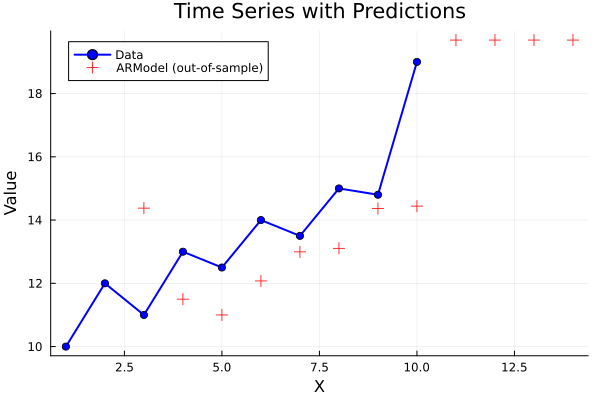

In [26]:
# Example with SES model

# Fit SES model (alpha will be optimized)
model_ar = ARModel(p=1)

# Forecast
predicted_ses = iterative_predict(model_ar, ts, 4)

# Plot
plot_timeseries(ts, predicted_ses)

# AR(2) On Random Walk

Cross-validated RMSE: 2.8419164366137317
TimeSeries{Float64}([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [-0.8985730578205149, 1.3725797558875237, 1.303629612825318, 0.9884379345920014, 1.387188883814244, 1.2438227005126508, 0.6428326784986371, 1.4583452825970569, 1.3034512256251838, 2.214236248443299, 1.9368464947243025, 1.376697072021265, 1.6278952642304207, 2.7016888013810996, 3.3766613843640214, 2.8761631973516897, 3.410656870836146, 4.330840639360817, 5.315529617433496, 3.9921679145880593, 5.273240275094285, 5.825919037204766, 7.2306680964794765, 6.450295625098221, 6.23962135590167, 4.047549121960035, 2.7765453314808277, 3.16356342357461

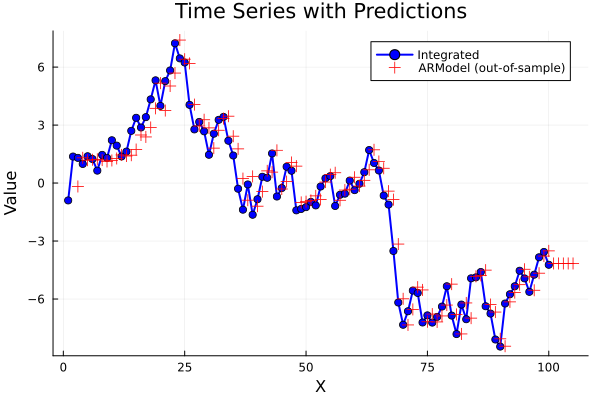

In [ ]:
ar = ARModel(p=1)

white = integrate(TimeSeries(randn(100)))

predictions = iterative_predict(ar, white, 5)
println(white)
plot_timeseries(white, predictions)

# ARIMA Model Test

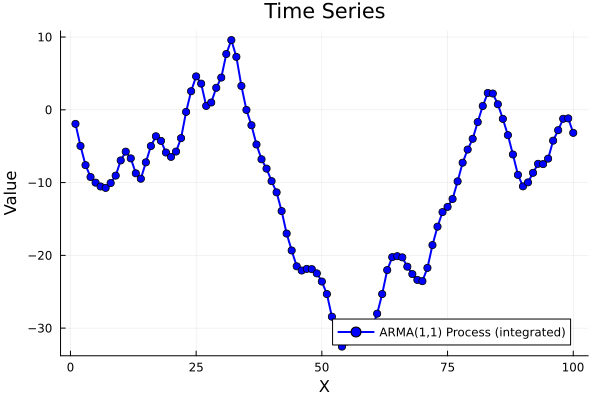

In [24]:
# Test ARIMA model
# Generate ARMA(1) data with trend
data = zeros(100)
mean = 0
data[1] = mean
errs = randn(100)
for t in 2:100
    data[t] = 0.7 * data[t-1] + errs[t] + errs[t-1] + mean  # ARMA(1, 1) with drift
end

# Integrate to create ARIMA data
arima_ts = integrate(TimeSeries(data))
arima_ts = integrate(ARMAProcess(100; phi=0.7, theta=0.5))
plot_ts(arima_ts)

ARIMA(2,1,2) fitted successfully
Parameters: Dict{Symbol, Any}(:original_values => [0.0, 0.3019329524715457, 0.42160941091013693, 1.9864962885872008, 2.586330092009953, 1.6478488682935244, 2.1146592252848673, 4.1625112024829924, 6.5525338422212, 9.16263043261507, 12.038288948365777, 14.311745108410193, 13.681257975447583, 10.470281136713881, 5.837313851806625, 0.7358248489596022, -3.3846829251813473, -6.3306188046239456, -8.352230633034775, -10.462508193147961, -12.311449454653326, -12.64961666082816, -11.666600301460617, -11.165770357270738, -11.174820115152315, -10.769660753167289, -9.76118983711857, -9.126158695465628, -8.482963088719995, -5.917692038460329, -2.7222624886350544, -1.4738607083328592, -0.5251124121290032, 1.6918893763471943, 3.3771772391000106, 4.121903244656096, 4.496813783383464, 4.974104215988999, 6.333548088587261, 6.304033504669343, 3.4916444388680246, -0.04522627957521497, -2.360376274960266, -2.614315231502795, -3.5846735377270535, -5.939722400861888, -9.058425

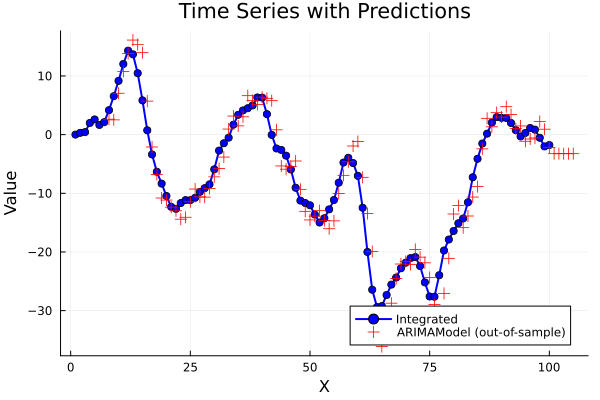

In [15]:

# Create ARIMA(1,1,1) model - will difference once, then fit AR(1) and MA(1)
p, d, q = 2, 1, 2
arima = ARIMAModel(p=p, d=d,  q=q)

# Fit and predict
fit(arima, arima_ts)
predictions = forecast(arima, arima_ts, 10)

println("ARIMA($p,$d,$q) fitted successfully")
println("Parameters: $(get_parameters(arima))")
println("Forecast values: $(predictions.values)")

predictions = iterative_predict(arima, arima_ts, 5)
plot_timeseries(arima_ts, predictions)